# DS II Project 

**Phase 1: Preprocessing**

Exploring the given annotations

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
from scipy.io import loadmat
from PIL import Image 
from IPython.display import display

In [2]:
mat = loadmat("C:\\Users\\micae\\Career Projects\\Car Dataset\\Car Dataset\\cars_annos.mat")

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'annotations', 'class_names'])

In [4]:
class_names = mat["class_names"]

In [5]:
class_names.shape

(1, 196)

In [6]:
class_names

array([[array(['AM General Hummer SUV 2000'], dtype='<U26'),
        array(['Acura RL Sedan 2012'], dtype='<U19'),
        array(['Acura TL Sedan 2012'], dtype='<U19'),
        array(['Acura TL Type-S 2008'], dtype='<U20'),
        array(['Acura TSX Sedan 2012'], dtype='<U20'),
        array(['Acura Integra Type R 2001'], dtype='<U25'),
        array(['Acura ZDX Hatchback 2012'], dtype='<U24'),
        array(['Aston Martin V8 Vantage Convertible 2012'], dtype='<U40'),
        array(['Aston Martin V8 Vantage Coupe 2012'], dtype='<U34'),
        array(['Aston Martin Virage Convertible 2012'], dtype='<U36'),
        array(['Aston Martin Virage Coupe 2012'], dtype='<U30'),
        array(['Audi RS 4 Convertible 2008'], dtype='<U26'),
        array(['Audi A5 Coupe 2012'], dtype='<U18'),
        array(['Audi TTS Coupe 2012'], dtype='<U19'),
        array(['Audi R8 Coupe 2012'], dtype='<U18'),
        array(['Audi V8 Sedan 1994'], dtype='<U18'),
        array(['Audi 100 Sedan 1994'], dtype='<U

Note: The class names in the annotations start from 1 not 0. 

In [7]:
def Makes(class_names):
    labels = str(class_names).split("array([")
    labels.pop(0)
    for i in range(len(labels)):
        mat_class_names = labels[i]
        mat_class_names = mat_class_names.split(']')[0]
        labels[i] = mat_class_names
    Makes = []
    for i in range(len(labels)):
        label = labels[i]
        label = label.split(" ")
        if (label[0] not in Makes):
            Makes.append(label[0])
    return Makes

Makes = Makes(class_names)
print("Number of Labels: ", class_names.shape[1])
print("Number of Makes: ", len(Makes))

Number of Labels:  196
Number of Makes:  49


Retrieve training and testing annotations

In [8]:
annotation_info = mat['annotations']
training_annos = list()
testing_annos = list()

#get training and testing annotations 
for i in range(annotation_info.shape[1]):
    if (int(annotation_info[0][i][6]) == 0):
        training_annos.append(annotation_info[0][i])
    elif (int(annotation_info[0][i][6]) == 1):
        testing_annos.append(annotation_info[0][i])

In [9]:
training_annos[0].dtype

dtype([('relative_im_path', 'O'), ('bbox_x1', 'O'), ('bbox_y1', 'O'), ('bbox_x2', 'O'), ('bbox_y2', 'O'), ('class', 'O'), ('test', 'O')])

In [10]:
testing_annos[0].dtype

dtype([('relative_im_path', 'O'), ('bbox_x1', 'O'), ('bbox_y1', 'O'), ('bbox_x2', 'O'), ('bbox_y2', 'O'), ('class', 'O'), ('test', 'O')])

Retrieve images from car_ims folder

In [11]:
def get_images(annos, path):
    images = []
    for i in range(7200,8041):#slices: 1200, 1200-2400, 2400-3600, 3600-4800, 4800-6000, 6000-7200, 7200- 8145 (TRAIN), 7200-8042 (TESTING)
        img_PIL = cv2.imread(path+img_name)
        images.append(img_PIL)
    return images        

In [12]:
#path should not include cars_ims\\picture; that is taken care of in the function 
#train_set = get_images(training_annos,path ="C:\\Users\\micae\\Downloads\\")
test_set = get_images(testing_annos,path ="C:\\Users\\micae\\Downloads\\")

In [13]:
#plt.imshow(train_set[0])

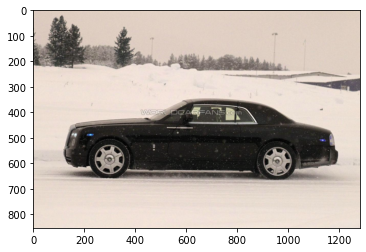

In [14]:
plt.imshow(test_set[0])

Set bounding boxes on images

In [15]:
#first index = stays the same for each picture
def get_bounding_boxes(image_set,image_annos):
    img_num = 0
    x1 = 0
    x2 = 0
    y1 = 0
    y2 = 0
    bounded= list()
    for i in range(7200,8041): #CHANGE HERE
        for j in range(1,5):
            if (j == 1):
                x1 = int(image_annos[i][j]) 
            elif(j == 2):
                y1 = int(image_annos[i][j])
            elif(j == 3):
                x2 = int(image_annos[i][j])
            else:
                y2 = int(image_annos[i][j])
        start = (x1,y1)
        end = (x2,y2)
        bounded.append(cv2.rectangle(image_set[img_num],start,end,(255,0,0), 3))
        img_num+=1
    
    return bounded

In [16]:
#train_with_boxes = get_bounding_boxes(train_set, training_annos)
test_with_boxes =get_bounding_boxes(test_set, testing_annos) 

In [17]:
#plt.imshow(train_with_boxes[0])

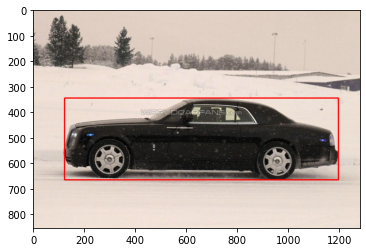

In [18]:
plt.imshow(test_with_boxes[0])

Crop images

In [19]:
def crop_images(images, annos):
    img_num = 0
    cropped = []
    x1 = 0
    x2 = 0
    y1 = 0
    y2 = 0
    for i in range(7200,8041): #CHANGE HERE
        for j in range(1,5):
            if (j == 1):
                x1 = int(annos[i][j]) 
            elif(j == 2):
                y1 = int(annos[i][j])
            elif(j == 3):
                x2 = int(annos[i][j])
            else:
                y2 = int(annos[i][j])
        start = (x1,y1)
        end = (x2,y2)
        img = images[img_num]
        img_num+=1
        img = img[start[1]:end[1], start[0]:end[0]]
        cropped.append(img)
    return cropped

In [20]:
#train_cropped = crop_images(train_with_boxes, training_annos)
test_cropped = crop_images(test_with_boxes, testing_annos)

In [21]:
#plt.imshow(train_cropped[0])

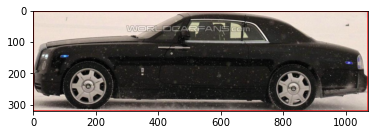

In [22]:
plt.imshow(test_cropped[0])

Resize all the images to have constant dimensions  

In [23]:
def resize_images(images, annos):
    resize = []
    for i in range(len(images)):
        img = images[i]
        dim = (200,200)
        img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        resize.append(img)
    return resize

In [24]:
#train_resized = resize_images(train_cropped, training_annos)
test_resized = resize_images(test_cropped, testing_annos)
#plt.imshow(train_resized[0])

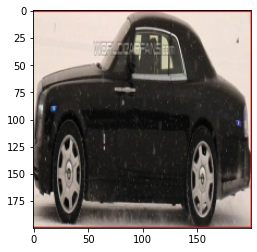

In [25]:
plt.imshow(test_resized[0])

Convert images to gray scale to reduce dimensionality 

In [26]:
def grayscale(images):
    gray = []
    for i in range(len(images)):
        gray.append(cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY))
    return gray

In [27]:
#train_grayscale = grayscale(train_resized)
test_grayscale = grayscale(test_resized)

Note: used cmap == gray because matplotlib plots colors according to intensity; similar to a heat map 

In [28]:
#plt.imshow(train_grayscale[0],cmap='gray')

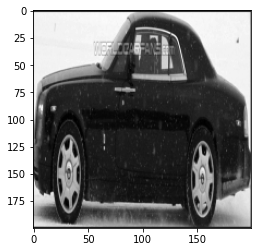

In [29]:
plt.imshow(test_grayscale[0],cmap='gray')

In [30]:
#export images 
directory = 'C:\\Users\\micae\\OneDrive\\Documents\\DS 2 dataset\\test'
os.chdir(directory)
img_num = 0
for i in range(7200,8041):#CHANGE
    img_name = str(testing_annos[i][0]).replace("['", "")
    img_name = img_name.replace("']", "")
    img_name  =img_name.replace("/", "\\")
    img_name = img_name.replace("car_ims\\","")
    cv2.imwrite(img_name, test_grayscale[img_num])
    img_num+=1